<a href="https://colab.research.google.com/github/hemu2014/python-ML/blob/main/test/Natural_Language_Processing_with_RNNs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing
Natural Language Processing (or NLP for short) is a discipline in computing that deals with the communication between natural (human) languages and computer languages. A common example of NLP is something like spellcheck or autocomplete. Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages.

###Recurrent Neural Networks

In this tutorial we will introduce a new kind of neural network that is much more capable of processing sequential data such as text or characters called a **recurrent neural network** (RNN for short).

We will learn how to use a reccurent neural network to do the following:
- Sentiment Analysis
- Character Generation

RNN's are complex and come in many different forms so in this tutorial we wil focus on how they work and the kind of problems they are best suited for.



## Sequence Data
In the previous tutorials we focused on data that we could represent as one static data point where the notion of time or step was irrelevant. Take for example our image data, it was simply a tensor of shape (width, height, channels). That data doesn't change or care about the notion of time.

In this tutorial we will look at sequences of text and learn how we can encode them in a meaningful way. Unlike images, sequence data such as long chains of text, weather patterns, videos and really anything where the notion of a step or time is relevant needs to be processed and handled in a special way.

But what do I mean by sequences and why is text data a sequence? Well that's a good question. Since textual data contains many words that follow in a very specific and meaningful order, we need to be able to keep track of each word and when it occurs in the data. Simply encoding say an entire paragraph of text into one data point wouldn't give us a very meaningful picture of the data and would be very difficult to do anything with. This is why we treat text as a sequence and process one word at a time. We will keep track of where each of these words appear and use that information to try to understand the meaning of peices of text.



##Encoding Text
As we know machine learning models and neural networks don't take raw text data as an input. This means we must somehow encode our textual data to numeric values that our models can understand. There are many different ways of doing this and we will look at a few examples below.

Before we get into the different encoding/preprocessing methods let's understand the information we can get from textual data by looking at the following two movie reviews.

```I thought the movie was going to be bad, but it was actually amazing!```

```I thought the movie was going to be amazing, but it was actually bad!```

Although these two setences are very similar we know that they have very different meanings. This is because of the **ordering** of words, a very important property of textual data.

Now keep that in mind while we consider some different ways of encoding our textual data.

###Bag of Words
The first and simplest way to encode our data is to use something called **bag of words**. This is a pretty easy technique where each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency. Have a look at the python function below that encodes a string of text into bag of words.

In [ ]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1

    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1

  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

This isn't really the way we would do this in practice, but I hope it gives you an idea of how bag of words works. Notice that we've lost the order in which words appear. In fact, let's look at how this encoding works for the two sentences we showed above.



In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

We can see that even though these sentences have a very different meaning they are encoded exaclty the same way. Obviously, this isn't going to fly. Let's look at some other methods.



###Integer Encoding
The next technique we will look at is called **integer encoding**. This involves representing each word or character in a sentence as a unique integer and maintaining the order of these words. This should hopefully fix the problem we saw before were we lost the order of words.


In [ ]:
vocab = {}
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ")
  encoding = []

  for word in words:
    if word in vocab:
      code = vocab[word]
      encoding.append(code)
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1

  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

And now let's have a look at one hot encoding on our movie reviews.

In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_encode = one_hot_encoding(positive_review)
neg_encode = one_hot_encoding(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Much better, now we are keeping track of the order of words and we can tell where each occurs. But this still has a few issues with it. Ideally when we encode words, we would like similar words to have similar labels and different words to have very different labels. For example, the words happy and joyful should probably have very similar labels so we can determine that they are similar. While words like horrible and amazing should probably have very different labels. The method we looked at above won't be able to do something like this for us. This could mean that the model will have a very difficult time determing if two words are similar or not which could result in some pretty drastic performace impacts.



###Word Embeddings
Luckily there is a third method that is far superior, **word embeddings**. This method keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

This is the technique we will use for our examples and its implementation will be showed later on.



##Recurrent Neural Networks (RNN's)
Now that we've learned a little bit about how we can encode text it's time to dive into recurrent neural networks. Up until this point we have been using something called **feed-forward** neural networks. This simply means that all our data is fed forwards (all at once) from left to right through the network. This was fine for the problems we considered before but won't work very well for processing text. After all, even we (humans) don't process text all at once. We read word by word from left to right and keep track of the current meaning of the sentence so we can understand the meaning of the next word. Well this is exaclty what a recurrent neural network is designed to do. When we say recurrent neural network all we really mean is a network that contains a loop. A RNN will process one word at a time while maintaining an internal memory of what it's already seen. This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.

This is why we are treating our text data as a sequence! So that we can pass one word at a time to the RNN.

Let's have a look at what a recurrent layer might look like.

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)
*Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/*

Let's define what all these variables stand for before we get into the explination.

**h<sub>t</sub>** output at time t

**x<sub>t</sub>** input at time t

**A** Recurrent Layer (loop)

What this diagram is trying to illustrate is that a recurrent layer processes words or input one at a time in a combination with the output from the previous iteration. So, as we progress further in the input sequence, we build a more complex understanding of the text as a whole.

What we've just looked at is called a **simple RNN layer**. It can be effective at processing shorter sequences of text for simple problems but has many downfalls associated with it. One of them being the fact that as text sequences get longer it gets increasingly difficult for the network to understand the text properly.



##LSTM
The layer we dicussed in depth above was called a *simpleRNN*. However, there does exist some other recurrent layers (layers that contain a loop) that work much better than a simple RNN layer. The one we will talk about here is called LSTM (Long Short-Term Memory). This layer works very similarily to the simpleRNN layer but adds a way to access inputs from any timestep in the past. Whereas in our simple RNN layer input from previous timestamps gradually disappeared as we got further through the input. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

For the purpose of this course we will refrain from going any further into the math or details behind how these layers work.



##Sentiment Analysis
And now time to see a recurrent neural network in action. For this example, we are going to do something called sentiment analysis.

The formal definition of this term from Wikipedia is as follows:

*the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.*

The example we’ll use here is classifying movie reviews as either postive, negative or neutral.

*This guide is based on the following tensorflow tutorial: https://www.tensorflow.org/tutorials/text/text_classification_rnn*



###Movie Review Dataset
Well start by loading in the IMDB movie review dataset from keras. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.





In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

In [ ]:
# Lets look at one review
train_data[1]

###More Preprocessing
If we have a look at some of our loaded in reviews, we'll notice that they are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:
- if the review is greater than 250 words then trim off the extra words
- if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.

Luckily for us keras has a function that can do this for us:




In [ ]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

###Creating the Model
Now it's time to create the model. We'll use a word embedding layer as the first layer in our model and add a LSTM layer afterwards that feeds into a dense node to get our predicted sentiment.

32 stands for the output dimension of the vectors generated by the embedding layer. We can change this value if we'd like!

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

###Training
Now it's time to compile and train the model.

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

And we'll evaluate the model on our training data to see how well it performs.

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

So we're scoring somewhere in the mid-high 80's. Not bad for a simple recurrent network.

###Making Predictions
Now let’s use our network to make predictions on our own reviews.

Since our reviews are encoded well need to convert any review that we write into that form so the network can understand it. To do that well load the encodings from the dataset and use them to encode our own data.




In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)


In [ ]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]

print(decode_integers(encoded))

In [ ]:
# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred)
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)


##RNN Play Generator

Now time for one of the coolest examples we've seen so far. We are going to use a RNN to generate a play. We will simply show the RNN an example of something we want it to recreate and it will learn how to write a version of it on its own. We'll do this using a character predictive model that will take as input a variable length sequence and predict the next character. We can use the model many times in a row with the output from the last predicition as the input for the next call to generate a sequence.


*This guide is based on the following: https://www.tensorflow.org/tutorials/text/text_generation*

In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###Dataset
For this example, we only need one peice of training data. In fact, we can write our own poem or play and pass that to the network for training if we'd like. However, to make things easy we'll use an extract from a shakesphere play.




In [5]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

###Loading Your Own Data
To load your own data, you'll need to upload a file from the dialog below. Then you'll need to follow the steps from above but load in this new file instead.



####这个模块是 Google Colab 提供的，用于在 Colab 环境中处理文件上传和下载。

In [ ]:
from google.colab import files
path_to_file = list(files.upload().keys())[0]

###Read Contents of File
Let's look at the contents of the file.

In [7]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


####查看前250的字符

In [8]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



###Encoding
Since this text isn't encoded yet well need to do that ourselves. We are going to encode each unique character as a different integer.



In [9]:
vocab = sorted(set(text))  # 使用集合将字符变位唯一的值，然后进行排序, 构建文本的词汇表（vocabulary），即所有可能出现的唯一字符的集合。
# Creating a mapping from unique characters to indices
#生成一个字典，将每个字符映射到对应的索引（整数）：
char2idx = {u:i for i, u in enumerate(vocab)}  # 将vocal中的字符以字典形式，如:{char: index}
#用途：将字符转换为模型可处理的数字（如 'h' → 1）。
#将vocab转换为NumPy数组，用于通过索引反向查找字符：,本身char2idx字典就是同过索引进行构建的
idx2char = np.array(vocab)
#用途：将模型输出的数字转换回字符（如 1 → 'h'）。
def text_to_int(text):
  return np.array([char2idx[c] for c in text])  #返回一个对应索引的数组

text_as_int = text_to_int(text)  #将文本全部转为数字

* A-Z： 13-38，
* a-z: 39-64
* 空格： 1， 不同的文本不一样，只针对当前文本

In [10]:
# lets look at how part of our text is encoded
print("Text:", text[:13])
print("Encoded:", text_to_int(text[:13]))

Text: First Citizen
Encoded: [18 47 56 57 58  1 15 47 58 47 64 43 52]


And here we will make a function that can convert our numeric values to text.


In [12]:
def int_to_text(ints):
  try:
    ints = ints.numpy()  # 将列表转为numpy数组-如果输入 ints 是 TensorFlow 张量（如模型输出），将其转换为 NumPy 数组。
  except:
    pass #如果已经是 NumPy 数组或列表，.numpy() 会抛出异常，此时直接跳过（pass）。
  return ''.join(idx2char[ints]) # 将索引转为对应的字符，进行连接
print(text_as_int[:13])  # 取前13个字符
print(int_to_text(text_as_int[:13]))

[18 47 56 57 58  1 15 47 58 47 64 43 52]
First Citizen


###Creating Training Examples
Remember our task is to feed the model a sequence and have it return to us the next character. This means we need to split our text data from above into many shorter sequences that we can pass to the model as training examples.

The training examples we will prepapre will use a *seq_length* sequence as input and a *seq_length* sequence as the output where that sequence is the original sequence shifted one letter to the right. For example:

```input: Hell | output: ello```

Our first step will be to create a stream of characters from our text data.

In [13]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

Next we can use the batch method to turn this stream of characters into batches of desired length.

####drop_remainder=True 会丢弃不足 seq_length+1 的剩余字符。
将长序列分割成多个 seq_length+1 的块

In [15]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

Now we need to use these sequences of length 101 and split them into input and output.

* map 操作：
对 sequences 中的每个块应用 split_input_target 函数，生成最终的训练数据集 dataset。

* 数据集结构：
每个样本是 (input_text, target_text) 的元组，其中：

 input_text 和 target_text 的长度均为 seq_length。

* 示例：
* 若分块为 [1, 2, 3] 和 [4, 5, 6]，则转换后：

* input_text=[1, 2], target_text=[2, 3]

* input_text=[4, 5], target_text=[5, 6]

In [16]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell， 输入
    target_text = chunk[1:]  # ello， 输出
    return input_text, target_text  # hell, ello

#每个样本的前 seq_length 个字符是输入，最后一个字符是目标：
dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry
#或者直接使用lambda函数
#dataset = sequences.map(lambda chunk: (chunk[:-1], chunk[1:]))
# 每个样本是 (input_text, target_text) 的元组

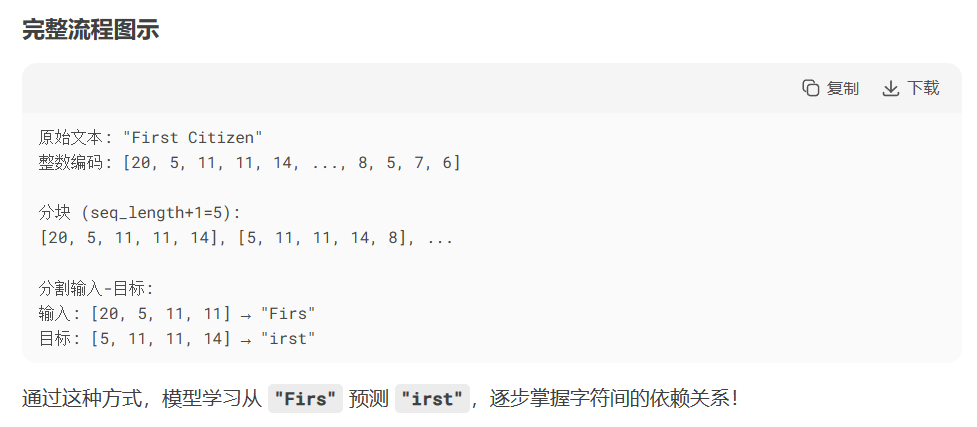

In [20]:
for x, y in dataset.take(2):
  print(x)
  print(y)
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))

tf.Tensor(
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59], shape=(100,), dtype=int64)
tf.Tensor(
[47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43  1
 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43 39
 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49  6
  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0
 37 53 59  1], shape=(100,), dtype=int64)


EXAMPLE

INPUT
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OUTPUT
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 
tf.Tensor(
[39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39 58 46 43 56  1

Finally we need to make training batches.

* 目的：将已经**分好的子序列块组合成训练批次**，每批次包含** BATCH_SIZE 个样本。**

* 输入：经过 split_input_target 处理后的 (input_text, target_text) 对（每个长度=100）。

* 输出：**形状为 (BATCH_SIZE, seq_length) 的张量**。（64，100）

* 为什么需要这个操作？
GPU/TPU 需要并行处理多个样本（即一个批次）以提高效率，而不是逐个处理。

In [23]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024
print(type(vocab))
print(vocab)
print(VOCAB_SIZE)
# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

# 将前面分成的101序列块，每BATCH_SIZE的大小作为一个批次
data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

<class 'list'>
['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
65


###Building the Model
Now it is time to build the model. We will use an embedding layer a LSTM and one dense layer that contains a node for each unique character in our training data. The dense layer will give us a probability distribution over all nodes.



```
# 这段代码之所以会提示 ValueError: Unrecognized keyword arguments passed to
Embedding: {'batch_input_shape': [64, None]}，是因为
tf.keras.layers.Embedding 层没有名为 batch_input_shape 的参数。

```
* batch_input_shape 是用于指定模型输入的形状，包括批次大小（当批次大小固定时，特别是对于有状态的 RNN）。在 Keras 的 Sequential 模型中，通常有几种方式来指定输入形状：

* 在第一层使用 input_shape： 这会为模型自动创建一个 InputLayer，但不包含批次大小**（批次大小默认为 None，即不固定）。**
* 在第一层使用 batch_input_shape： 这会为模型自动创建一个 InputLayer，并**指定包含批次大小在内的完整输入形状。这对于需要固定批次大小的情况（例如有状态的 RNN）是必需的。**
* 显式添加 tf.keras.Input 层作为 Sequential 模型的第一项： 这是最灵活的方式，可以精确控制输入的名称、形状、dtype 等。
* 对于你代码中的情况，你在 Embedding 层中使用了 batch_input_shape。然而，Embedding 层本身并不直接接受 batch_input_shape 参数。Embedding 层主要关注词汇表大小 (input_dim) 和嵌入维度 (output_dim)，以及可选的输入序列长度 (input_length)。输入数据的批次形状通常由模型整体或前一个层（如果存在的话）确定。

* 考虑到你的** LSTM 层设置了 stateful=True，这意味着你需要一个固定批次大小的输入。在 Keras 的 Sequential 模型中，**当使用**有状态层时，你应该在第一个有状态层中指定 batch_input_shape**。在你的代码中，第一个有状态层是 tf.keras.layers.LSTM。



In [33]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
      # 使用 Input 层明确指定输入形状
      #tf.keras.layers.Input(shape=(None,), batch_size=batch_size),  # 明确批次和序列长度
    tf.keras.layers.Embedding(vocab_size,
                embedding_dim,
                #batch_input_shape=[batch_size, None]
                              ),
    tf.keras.layers.LSTM(rnn_units,
              return_sequences=True,
              stateful=True,
              recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.build(input_shape=(BATCH_SIZE, None))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (64, None, 256)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (64, None, 1024)       │     5,246,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, None, 65)         │        66,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,330,241 (20.33 MB)

 Trainable params: 5,330,241 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

###Creating a Loss Function
Now we are going to create our own loss function for this problem. This is because our model will output a (64, sequence_length, 65) shaped tensor that represents the probability distribution of each character at each timestep for every sequence in the batch.



However, before we do that let's have a look at a sample input and the output from our untrained model. This is so we can understand what the model is giving us.



###(64, 100, 65) 表示**64个样本**，每个样本**100个时间步**，每个时间**步65维特征**。

In [39]:
for input_example_batch, target_example_batch in data.take(1):
  # 输入数据形状
  print(input_example_batch.shape)

  #请求我们的模型对我们第一批训练数据（64 个条目）进行预测
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape
  print(example_batch_predictions[0][0])
  print(example_batch_predictions[0][1])

(64, 100)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
tf.Tensor(
[-3.2696445e-03 -1.2376723e-02  3.8370239e-03  5.9226742e-03
  8.4966398e-04  6.3707819e-04 -3.2248683e-03  4.6792319e-03
  8.4826723e-03 -1.0885636e-02 -5.6860242e-03 -5.8723614e-03
  6.5149250e-03  5.1831297e-04 -2.4613808e-04 -1.8955334e-03
  1.0494817e-03  3.7045146e-03  1.6457622e-03 -5.6579709e-03
  7.6488657e-03 -1.1541422e-03  3.3561406e-03  2.5350940e-03
  2.5231296e-03 -1.7193683e-03 -7.8233397e-03 -3.7670000e-03
 -2.3238631e-03  4.9749459e-03 -1.0043662e-03 -1.3106775e-02
 -1.1717054e-02 -1.3429457e-03  8.0738002e-03  4.0285839e-03
  4.0602903e-03 -4.1072333e-04  4.2157806e-03 -3.8029253e-03
 -6.7795520e-03  1.4221622e-03  7.3611336e-03  5.5985488e-03
 -3.6038601e-04  9.3762123e-05 -9.9102221e-03 -7.4549182e-04
 -8.5672643e-03  2.6739445e-03  4.3251431e-03 -3.5098370e-03
  5.6596408e-03  4.0573082e-03 -9.2081977e-03  1.2552817e-03
  2.3982709e-03  1.2699397e-02 -2.4637638e-04  1.3244777e-02
 -3.30

In [41]:
# we can see that the predicition is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions)) #获取的是第一个维度64， （64,100,65）
print(example_batch_predictions[0][2])

64
tf.Tensor(
[ 0.00470225 -0.01413222  0.00238819  0.01187135 -0.00033031  0.00175647
 -0.00398558  0.0039864   0.0055445  -0.01421509 -0.00833448 -0.00921352
  0.00957203 -0.00058308 -0.00148188 -0.00406361 -0.00180265  0.00356982
  0.00604601 -0.00125827  0.00782033  0.00221363  0.00230867  0.00561536
 -0.00480284 -0.00416142 -0.01409853 -0.00654454 -0.00550266  0.00695849
  0.00106328 -0.00676918 -0.01267423 -0.00051168  0.01040247  0.00199739
  0.00106481  0.0029334   0.01510281 -0.00271383 -0.00238983 -0.00082306
  0.00320973  0.00616054 -0.00546499  0.00557436 -0.00160319  0.00208347
 -0.00547659 -0.00548695 -0.00482577 -0.00320398  0.00113715  0.00410811
 -0.01190187  0.00212105  0.01309738  0.01198968 -0.00702292  0.01302649
 -0.00455395  0.00238113  0.00584009 -0.00748114  0.00374455], shape=(65,), dtype=float32)


In [42]:
# lets examine one prediction
pred = example_batch_predictions[0]  # (100,65)
print(len(pred)) # 获取第一个维度100
print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

100
tf.Tensor(
[[-3.2696445e-03 -1.2376723e-02  3.8370239e-03 ...  5.6107761e-03
  -4.3406999e-03  5.4493346e-03]
 [-7.4241543e-04 -1.3442170e-02  5.4824067e-04 ...  6.4918017e-03
  -7.7512152e-03  5.9877853e-03]
 [ 4.7022486e-03 -1.4132218e-02  2.3881912e-03 ...  5.8400920e-03
  -7.4811368e-03  3.7445477e-03]
 ...
 [ 5.9592929e-03 -4.1347439e-03 -9.6491864e-04 ...  1.1159776e-02
  -5.2324440e-03  4.7986093e-04]
 [ 7.3333024e-03 -5.9105516e-03  2.8921640e-05 ...  1.3939661e-02
  -4.8860307e-03 -3.1912522e-03]
 [ 1.1219820e-02 -9.7206086e-03  2.8178464e-03 ...  1.1770212e-02
  -3.5969992e-03 -4.5317477e-03]], shape=(100, 65), dtype=float32)


In [43]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]  #（65，）
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

65
tf.Tensor(
[-3.2696445e-03 -1.2376723e-02  3.8370239e-03  5.9226742e-03
  8.4966398e-04  6.3707819e-04 -3.2248683e-03  4.6792319e-03
  8.4826723e-03 -1.0885636e-02 -5.6860242e-03 -5.8723614e-03
  6.5149250e-03  5.1831297e-04 -2.4613808e-04 -1.8955334e-03
  1.0494817e-03  3.7045146e-03  1.6457622e-03 -5.6579709e-03
  7.6488657e-03 -1.1541422e-03  3.3561406e-03  2.5350940e-03
  2.5231296e-03 -1.7193683e-03 -7.8233397e-03 -3.7670000e-03
 -2.3238631e-03  4.9749459e-03 -1.0043662e-03 -1.3106775e-02
 -1.1717054e-02 -1.3429457e-03  8.0738002e-03  4.0285839e-03
  4.0602903e-03 -4.1072333e-04  4.2157806e-03 -3.8029253e-03
 -6.7795520e-03  1.4221622e-03  7.3611336e-03  5.5985488e-03
 -3.6038601e-04  9.3762123e-05 -9.9102221e-03 -7.4549182e-04
 -8.5672643e-03  2.6739445e-03  4.3251431e-03 -3.5098370e-03
  5.6596408e-03  4.0573082e-03 -9.2081977e-03  1.2552817e-03
  2.3982709e-03  1.2699397e-02 -2.4637638e-04  1.3244777e-02
 -3.3090811e-03  1.1414931e-02  5.6107761e-03 -4.3406999e-03
  5.449334

In [51]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
#我们需要确定预测字符，需要采样输出分布（根据概率选择一个值）
#通过 tf.random.categorical 或 tf.argmax 转换为字符索引：
sampled_indices = tf.random.categorical(pred, num_samples=1) # pred(100,65) num_samples=1：每个时间步采样1个字符。
print(sampled_indices.shape)
#现在我们可以重塑该数组并将所有整数转换为数字以查看实际字符
# now we can reshape that array and convert all the integers to numbers to see the actual characters

# 重塑的形状是将（100,1）==》（1,100），使用[0]取第一个数据也就是（100，）
# 也是int_to_text函数需要的形状， 或者直接np.reshape(sampled_indices, (-1，))，直接改为（100，）
sampled_indices = np.reshape(sampled_indices, (1,-1))[0]


print(sampled_indices)
print(sampled_indices.shape)
predicted_chars = int_to_text(sampled_indices)
## 并且这是模型对训练序列1的预测
predicted_chars  # and this is what the model predicted for training sequence 1

(100, 1)
[37 21 56 11 21 61  9 48 53 35  4 23 37 37 25  5 37 43 19 36 45 56 12 56
  6 17 54 30 14 37 28 44 15 11  4 29 59 21 18 51 41 42 25  7 44 59  5 36
 44 62 34  5 10 26 26  7 35 23 44 23 47 35 63 28 18 33 52 14 31 41 45 43
 59 56 24 64 47 37 12  7 32 30 12 42 62 12 36 22  9 52 14  8 20  5  3 49
 22 29  9 22]
(100,)


"YIr;Iw3joW&KYYM'YeGXgr?r,EpRBYPfC;&QuIFmcdM-fu'XfxV':NN-WKfKiWyPFUnBScgeurLziY?-TR?dx?XJ3nB.H'$kJQ3J"

So now we need to create a loss function that can compare that output to the expected output and give us some numeric value representing how close the two were.

In [52]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

###Compiling the Model
At this point we can think of our problem as a classification problem where the model predicts the probabillity of each unique letter coming next.


In [55]:
example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.174199


未经训练的模型输出的损失值应接近 -log(1/vocab_size)（随机猜测的理论值）。例如，若 vocab_size=65，初始损失应在 -log(1/65) ≈ 4.17 左右。

In [53]:
model.compile(optimizer='adam', loss=loss)

###Creating Checkpoints
Now we are going to setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

* 通过将 checkpoint_prefix 修改为 os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")，您告诉 ModelCheckpoint 回调函数将模型的权重以 .weights.h5 格式保存到指定的文件路径中，文件名会包含当前的训练轮数。

重要提示

* 仅保存权重 (save_weights_only=True)： 这种方式只保存模型的可训练权重。
* 如果您需要保存模型的完整结构（包括层配置、优化器状态等），则应该将 save_weights_only 设置为 False，并且 filepath 通常以 .h5 或 .keras 结尾。
* 目录存在： 再次确认 ./training_checkpoints 目录是存在的并且可写的。

In [56]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

###Training
Finally, we will start training the model.

**If this is taking a while go to Runtime > Change Runtime Type and choose "GPU" under hardware accelerator.**



In [59]:
# Assuming 'data' is your _BatchDataset object, in this case dataset
for element in dataset.take(1):  # Get the first element from the dataset
    input_text, target_text = element # Unpack the tuple
    print(input_text.shape, target_text.shape)     # Print the shapes of the elements

(100,) (100,)


In [ ]:
history = model.fit(data, epochs=50, callbacks=[checkpoint_callback])

###Loading the Model
We'll rebuild the model from a checkpoint using a batch_size of 1 so that we can feed one peice of text to the model and have it make a prediction.

In [ ]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

Once the model is finished training, we can find the **lastest checkpoint** that stores the models weights using the following line.



In [61]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

ValueError: File format not supported: filepath=None. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

We can load **any checkpoint** we want by specifying the exact file to load.

In [62]:
checkpoint_num = 10
model.load_weights(tf.train.load_checkpoint("./training_checkpoints/ckpt_" + str(checkpoint_num)))
model.build(tf.TensorShape([1, None]))

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./training_checkpoints/ckpt_10

###Generating Text
Now we can use the lovely function provided by tensorflow to generate some text using any starting string we'd like.

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
'''
 使用 tf.expand_dims 函数在 input_eval 的最前面添加一个维度。这会将input_eval从一个形状为(length_of_start_string,)
 的列表或一维数组转换为一个形状为(1,length_of_start_string)
 的TensorFlow张量。这是因为模型通常期望接收批处理的输入，即使在生成单个序列时，
 我们也需要提供一个批大小为 1 的输入。
'''

  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  # 初始化一个空列表 text_generated，用于存储模型生成的字符。
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  #如果你的模型是一个有状态的 RNN (例如，在训练时设置了 stateful=True 的 LSTM 或 GRU)，
  #那么这行代码会在生成文本之前重置模型的内部状态。这确保了生成过程是从一个干净的状态开始的，
  #并且不会受到之前处理过的序列的影响。对于无状态的 RNN，这行代码没有实际作用。
  model.reset_states()
  for i in range(num_generate):
      #
      predictions = model(input_eval)
      # remove the batch dimension
      print(f"predictions.shape: {predictions.shape}")  # (1, seq_length, vocab_size)
      predictions = tf.squeeze(predictions, 0) #移除批次维度 → (seq_len, vocab_size)

      # # 应用温度参数调整多样性
      #这会调整概率分布的形状，从而影响生成文本的随机性。较高的 temperature 会使分布更平缓，增加低概率字符被选中的机会；
      #较低的 temperature 会使分布更尖锐，模型更倾向于选择高概率字符。
      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      #  tf.random.categorical(predictions, num_samples=1) ==> (seq_len, 1)
      print(f"categorical的形状: {tf.random.categorical(predictions, num_samples=1).shape}")
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy() ## 从分布中采样下一个字符
      print(f"predicted_id: {predicted_id}")
      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0) # 形状: (1,1)
      print(f"input_eval: {input_eval}")
      print(f"input_eval.shape: {input_eval.shape}")
      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

*And* that's pretty much it for this module! I highly reccomend messing with the model we just created and seeing what you can get it to do!

##Sources

1. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.
2. “Text Classification with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_classification_rnn.
3. “Text Generation with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_generation.
4. “Understanding LSTM Networks.” Understanding LSTM Networks -- Colah's Blog, https://colah.github.io/posts/2015-08-Understanding-LSTMs/.